Now I ran PennCNV on all samples at once (but the ones form a different box). Let's then use another PennCNV tool to check the QC. But first we merge the two resulting files:

In [4]:
%%bash
cd /data/NCR_SBRB/simplex/penncnv/results
cat all_simplex_but1.log fam_10369.log > all_simplex.log
cat all_simplex_but1.rawcnv fam_10369.rawcnv > all_simplex.rawcnv

In [5]:
%%bash

module load penncnv
cd /data/NCR_SBRB/simplex/penncnv/results

filter_cnv.pl all_simplex.rawcnv -qclogfile all_simplex.log -qclrrsd 0.35 \
    -qcpassout all_simplex.qcpass -qcsumout all_simplex.qcsum -out all_simplex

NOTICE: the --qcbafdrift argument is set as 0.01 by default
NOTICE: the --qcwf argument is set as 0.05 by default
NOTICE: Writting 122 file names that pass QC to qcpass file all_simplex.qcpass
NOTICE: Writting 130 records of QC summary to qcsum file all_simplex.qcsum


Again, based on my tests, these CNV calls are per individual, so it doesn't matter whether we call this first CNV calling command using single individuals, trios, or everyone. Later, when we refine based on trios, then it matters. 

In [1]:
import pandas as pd

df = pd.read_table('/data/NCR_SBRB/simplex/penncnv/results/all_simplex.qcsum')
# we ran for all samples, but let's look at only stats for samples in our simplex study
fid = open('/data/NCR_SBRB/simplex/sample_ids.txt', 'r')
samples = [line.rstrip() for line in fid]
fid.close()
keep_me = [i for i in range(df.shape[0]) if df.File[i].split('/')[-1] in samples]
df = df.iloc[keep_me]
df

,File,LRR_mean,LRR_median,LRR_SD,BAF_mean,BAF_median,BAF_SD,BAF_drift,WF,NumCNV
1,InfiniumExome/CLIA_400177,0.0001,0.0,0.1378,0.5010,0.5,0.0402,0.000000,0.0149,1
2,InfiniumExome/CLIA_400174,0.0129,0.0,0.1475,0.4995,0.5,0.0387,0.000079,0.0208,5
4,InfiniumExome/CLIA_400132,-0.0194,0.0,0.1490,0.5006,0.5,0.0428,0.000359,0.0202,12
5,InfiniumExome/CLIA_400197,0.0183,0.0,0.1670,0.4990,0.5,0.0371,0.000000,-0.0383,11
6,InfiniumExome/CLIA_400125,-0.0077,0.0,0.1767,0.4988,0.5,0.0406,0.000105,-0.0519,53
8,InfiniumExome/CLIA_400160,0.0141,0.0,0.1518,0.4983,0.5,0.0371,0.000000,-0.0238,5
9,InfiniumExome/CLIA_400211,0.0113,0.0,0.1674,0.4995,0.5,0.0360,0.000000,0.0310,21
11,InfiniumExome/CLIA_400170,0.0131,0.0,0.1266,0.5000,0.5,0.0323,0.000000,-0.0161,3
12,InfiniumExome/CLIA_400186,0.0172,0.0,0.1504,0.4993,0.5,0.0383,0.000084,-0.0187,9
13,InfiniumExome/CLIA_400140,0.0022,0.0,0.1338,0.4991,0.5,0.0362,0.000000,-0.0294,2


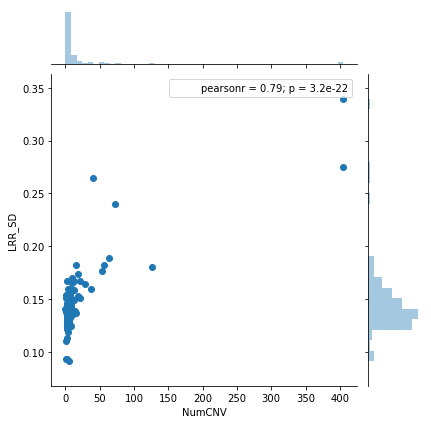

In [4]:
%matplotlib inline

import seaborn as sns

sns.jointplot(x='NumCNV', y='LRR_SD', data=df)

There are several outliers there, so it's mostly how stringent we want to be. Note that most samples show very few CNVs. That's what we would expect. Their homepage suggest something like 50 to be normal. Also, I'm not sure how much this depends on the HM parameters, but it's something else to check in the future. For now, let's remove anyone with more than 50 CNVs and replot it:

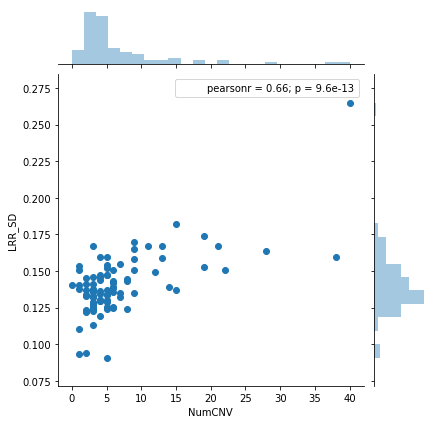

In [5]:
sns.jointplot(x='NumCNV', y='LRR_SD', data=df[df.NumCNV <= 50])

This looks better, but we still see many outliers. In the documentation example, the samples they qualified as "very good" were around SD < .14. So, let's trim our data even further:

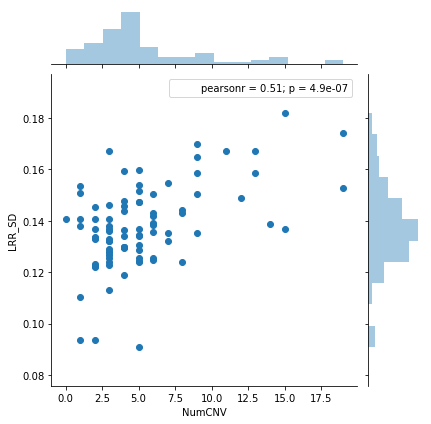

In [6]:
sns.jointplot(x='NumCNV', y='LRR_SD', data=df[df.NumCNV <= 20])

I could keep going here, but let's stop for now and re-run our trio refinement in the samples there are left.

But first, we need to figure out which trios we can still analyze, since we're removing several samples:

In [8]:
# figure out who is who in each trio

import glob
data_dir = '/data/NCR_SBRB/simplex/'
trios = {}
affected = []
controls = []
peds = glob.glob(data_dir + '*trio*ped')
for ped in peds:
    trio_name = ped.split('/')[-1].split('.')[0]
    fid = open(ped, 'r')
    fam = {}
    for line in fid:
        famid, sid, fa, mo, sex, aff = line.rstrip().split('\t')
        if fa != '0':
            fam['child'] = sid
            if aff == '1':
                affected.append(trio_name)
            else:
                controls.append(trio_name)
        elif sex == '1':
            fam['father'] = sid
        else:
            fam['mother'] = sid
    trios[trio_name] = fam
    fid.close()
    
fid = open('/data/NCR_SBRB/simplex/famids.txt', 'r')
fams = [t.rstrip() for t in fid]
fid.close()

In [16]:
use_trio = []
samples_left = [fn.split('/')[-1] for fn in df[df.NumCNV <= 20].File]
for tn, trio in trios.iteritems():
    if (trio['child'] in samples_left and
        trio['mother'] in samples_left and
        trio['father'] in samples_left):
        use_trio.append(tn)
use_trio.sort()
use_trio

['10033_trio1',
 '10033_trio2',
 '10090_trio1',
 '10090_trio2',
 '10094_trio1',
 '10094_trio2',
 '10128_trio1',
 '10128_trio2',
 '10164_trio1',
 '10164_trio2',
 '10173_trio2',
 '10178_trio1',
 '10178_trio2',
 '10182_trio1',
 '10182_trio2',
 '10197_trio1',
 '10215_trio2',
 '10215_trio3',
 '10215_trio4',
 '10369_trio1',
 '10369_trio2',
 '10406_trio1',
 '10406_trio2',
 '10406_trio3',
 '10448_trio1',
 '10448_trio2',
 '10459_trio2',
 '1892_trio1',
 '1892_trio2',
 '1893_trio2',
 '1895_trio1',
 '1895_trio2',
 '1976_trio1',
 '1976_trio3',
 '855_trio1',
 '855_trio2']

So, some families we won't use anymore, and others had their number of unaffected trios narrowed down. Let's redo our CNV refinement now:

# TODO

* try adjusted again
* check that I'm calling de novo and inherited CNVs properly
* try non-autossomal calling
* play with HMM parameters